# Neural Networks - Regression

In this tutorial, we will create a regression model, that predicts the fuel efficiency in miles per gallon (MPG). This is a continuous value, in contrast with a classification model where a class is predicted.

## 0. Import python modules

We will use the Tensoflow/Keras framework for neural network machine learning.

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from plot_loss import plot_loss # own function in plot_loss.py

## 1. Load the dataset

We read the dataset using pandas. The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

In [65]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv("/home/anir333/Desktop/KDG/Subjects/Year_2/Semester_1/DataAndAI/Python/dai2_dai3/Week6/06-Artificial neural networks/ dataset/auto-mpg.data", names=column_names, na_values='?', sep=' ', comment='\t', skipinitialspace=True)

In [66]:
# dataset.loc[dataset['Horsepower'].isnull(), 'Horsepower']#.isnull() # to see which values are null
# dataset.loc[dataset['Horsepower'].isnull()]#.isnull() # to see which values are null
dataset.tail()
dataset.shape

(398, 8)

## 2. Data cleaning and normalisation

The dataset contains a few unknown values which we will drop.

In [67]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [68]:
dataset = dataset.dropna()
dataset.isna().sum()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


We separate the input features `x` from the target values `y`.

In [69]:
x = dataset[["Cylinders","Displacement", "Horsepower", "Weight", "Acceleration", "Model Year"]]
y = dataset[['MPG']]

We now normalize the inputs using the `MinMaxScaler.` It is good practice always to do this so that all the features get the same scale and range (which is not the case in this dataset).

In [70]:
x.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [71]:
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

Next, we will split the data into a training and a test dataset.

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.1) 
x_train.shape

(352, 6)

## 3. Define the model

The input layer has 6 nodes, corresponding to the number of input features. We choose 2 hidden layers with 64 nodes and a `relu` activation function (feel free to try other values/functions). The output layer has 1 node corresponding to the one MPG value to predict. For regression models, a `linear` activation function is often used in the output layer. We choose Adam as optimizer with a learning rate of `0.001`. The loss is the `MSE` loss which is often used for regression models. We also define a `mean_absolute_percentage_error` metric.

In [73]:
# input layer 6 nodes
inputs = Input(shape=(6,))
# 2 hidden layer
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
# output layer
outputs = Dense(1, activation='linear')(x)
# construct the model
model = Model(inputs, outputs, name='auto-mpg')
# print a summary
model.summary()
# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_percentage_error']
)

Model: "auto-mpg"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Train the model

We train the model for 100 epochs, with a batch size of 32 (feel free to try other values). We take 10% of the training dataset for validation data.

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 596.3845 - mean_absolute_percentage_error: 99.5234 - val_loss: 540.8978 - val_mean_absolute_percentage_error: 97.6430
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 577.7209 - mean_absolute_percentage_error: 97.4629 - val_loss: 521.6678 - val_mean_absolute_percentage_error: 94.9205
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 561.9062 - mean_absolute_percentage_error: 94.7663 - val_loss: 494.7806 - val_mean_absolute_percentage_error: 91.1416
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 537.4812 - mean_absolute_percentage_error: 91.2218 - val_loss: 455.8028 - val_mean_absolute_percentage_error: 85.4623
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 515.5345 - mean_absolute_percentage_error: 85.3922 - val_loss: 402.0460 - val_mean_absolute_percentage_error: 76.9431
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 444.0965 - mean_absolute_percentage_error: 77.7393 - va

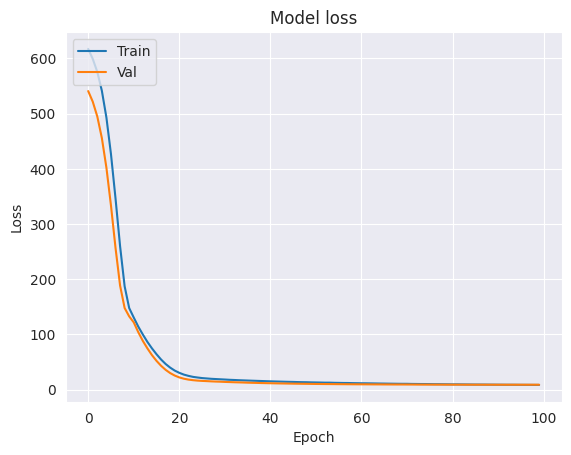

In [74]:
# train the model
history = model.fit(
    x_train, # training input
    y_train, # training targets
    epochs=100,
    batch_size=32,
    validation_split=0.1,
)
# plot loss function
plot_loss(history)

## 5. Evaluate the model

Now we evaluate our model with the test data, which has not been used during training. Have a look at the MAE.

In [75]:
# evaluate
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.8239 - mean_absolute_percentage_error: 12.9620 


[10.665262222290039, 12.753549575805664]

## 6. Use the model to predict

We can start using the model to predict the MPG. Here we predict the complte test dataset. 

In [78]:
# predict 
y_predicted = model.predict(x_test)
print(y_predicted[:3])
print(y_test[:3])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[19.8558  ]
 [14.082404]
 [28.590918]]
      MPG
155  15.0
26   10.0
268  27.2


We plot the predicted values against the true value.

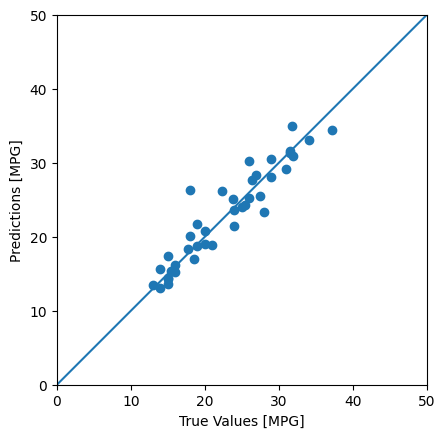

In [24]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

We plot the error distribution.

Text(0, 0.5, 'Count')

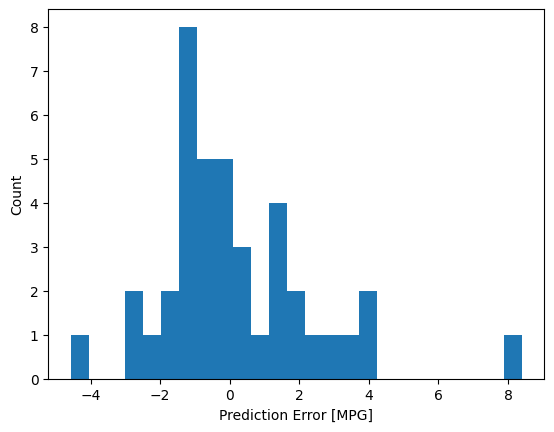

In [25]:
error = y_predicted - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')